In [1]:
from plio.io.io_moon_minerology_mapper import M3
from libpyhat.derived.m3 import pipe
from libpyhat.derived.m3 import new
import libpyhat as phat
from libpyhat.examples import get_path

%pylab inline

# Further documentation on LibPyHat can be found at: 
# https://usgs-astrogeology.github.io/PyHAT/

Populating the interactive namespace from numpy and matplotlib


# How to open an Image

In [2]:
# First, get the path of the file that contains the image you want to view.
# In this example, the program will search for and use the file "M3_4030seg_L2_aristcrater.tif"
# using the "get_path" function.
filepath = get_path('M3_4030seg_L2_aristcrater.tif')

# Next, use the M3 constructor found in the plio module to open the image
# by feeding it the filepath.
image = M3(filepath)

# In this case, the variable "image" can now be used as a reference to the given M3 image.

# How to Display a Single Band (By Index)

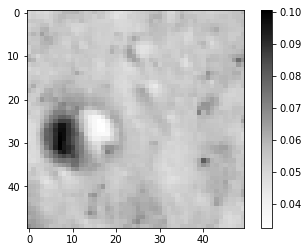

In [3]:
# First,open the desired .tif image and store it in a variable, as shown in the previous cell.

# The "get_path" function can be used inside of the M3 object constructor to achieve the same effect.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Next, run the function to display the band.
# The image[n] parameter is used to select the index (n) 
# The cmap parameter is used to select the color mapping.

# Some color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                                    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                                    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

imshow(tif_image[0], cmap='Greys')

# Finally, display the associated color key (colorbar) alongside the band.
colorbar()

# How to Display a Single Band (By Label)

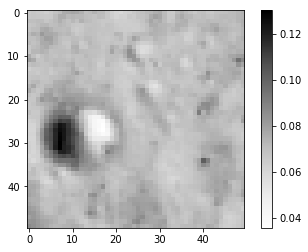

In [4]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Next, run the function to display the band.
# The image.loc[label] parameter is used to select the label. 
# The cmap parameter is used to select the color mapping.

# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

imshow(tif_image.loc[700], cmap='Greys')
colorbar()


# How to generate an olivine derived image

In [5]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Getting warnings for passing in the M3 object directly.
olivine_index_result = pipe.olindex(tif_image)

/home/egault/anaconda3/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 10.610000000000014
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/home/egault/anaconda3/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 9.75
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/home/egault/anaconda3/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested value and found values is 2.869999999999891
  warnings.warn("Absolute difference between requested value and found values is {}".format(vals[minidx]))
/home/egault/anaconda3/envs/pyhat/lib/python3.6/site-packages/plio/utils/indexing.py:64: UserWarning: Absolute difference between requested

# How to Display in Multi-Band (RGB 'mustard' Derived Image)

In [6]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Getting warnings for passing in the M3 object directly.
mustard_result = new.mustard(tif_image)

/home/egault/Desktop/pyhat_work/PyHAT-dev/PyHAT-dev/notebooks/libpyhat/derived/utils.py:192: UserWarning: Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.
  warnings.warn('Parameters involving some of the visible wavelengths ( < 600 nm) are not recommended for use. Parameters modeled after Clementine data are also not recommended. Original parameter estimates for OH and H2O should NOT be included.')


# Bonus: How to Display Two or More Single-Band Images at Once

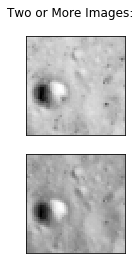

In [7]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Initialize the array to hold all of the band images.
images = []

# Specify how many bands you want to display.
number_of_images = 2

# Create the figure object that will hold the band images within subplots.
figure1, axes1 = subplots(number_of_images)

# Choose a title, if you want.
figure1.suptitle('Two or More Images:')

# Add the band images to the image array:

# axes[n] selects the row in which the image will be displayed (n).

# tif_image[i] selects band via index (i) from the tif image. 
# Note: 'tif_image.loc[label]' can also be used in order to select the band by label.

# The cmap parameter is used to select the color mapping.
# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

images.append(axes1[0].imshow(tif_image[0], cmap='Greys'))


images.append(axes1[1].imshow(tif_image[50], cmap='Greys'))

# By default, subplots have x and y tick labels, so this loop will remove them.
for axi in axes1:
    axi.set_xticks([])
    axi.set_yticks([])



# This could be useful for future applications, where someone may want to compare two or more specific bands.
# Running two imshows in a row would normally overwrite the previous imshow, so a matplotlib figure object
# can be used to remedy this.
# However, refactoring to make the code easier to manipulate and read would be ideal.
# At the moment, I'm not sure how to resize the image, or add a colorbar to each of them.